In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")


In [2]:
data = pd.read_csv('african_crises.csv', sep=",")

In [3]:
data.head()


,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [5]:
data.shape


(1059, 14)

In [8]:
total_count = data.shape[0]

In [10]:
print('Всего строк: {}'.format(total_count))

Всего строк: 1059


In [11]:
data.columns


Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [12]:
data.dtypes

case                                 int64
cc3                                 object
country                             object
year                                 int64
systemic_crisis                      int64
exch_usd                           float64
domestic_debt_in_default             int64
sovereign_external_debt_default      int64
gdp_weighted_default               float64
inflation_annual_cpi               float64
independence                         int64
currency_crises                      int64
inflation_crises                     int64
banking_crisis                      object
dtype: object

In [14]:
#Пустые значения
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

case - 0
cc3 - 0
country - 0
year - 0
systemic_crisis - 0
exch_usd - 0
domestic_debt_in_default - 0
sovereign_external_debt_default - 0
gdp_weighted_default - 0
inflation_annual_cpi - 0
independence - 0
currency_crises - 0
inflation_crises - 0
banking_crisis - 0


In [15]:
data.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


#### caseA - number which denotes a specific country
#### cc3A three letter country code
#### countryThe name of the country
#### yearThe year of the observation
#### systemic_crisis"0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.
#### exch_usdThe exchange rate of the country vis-a-vis the USD
#### domestic_debt_in_default"0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year
#### sovereign_external_debt_default"0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year
#### gdp_weighted_defaultThe total debt in default vis-a-vis the GDP
#### inflation_annual_cpiThe annual CPI Inflation rate
#### independence"0" means "no independence" and "1" means "independence"
#### currency_crises"0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year
#### inflation_crises"0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year
#### banking_crisis"no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year

In [46]:
data['sovereign_external_debt_default'].unique()

array([0, 1])

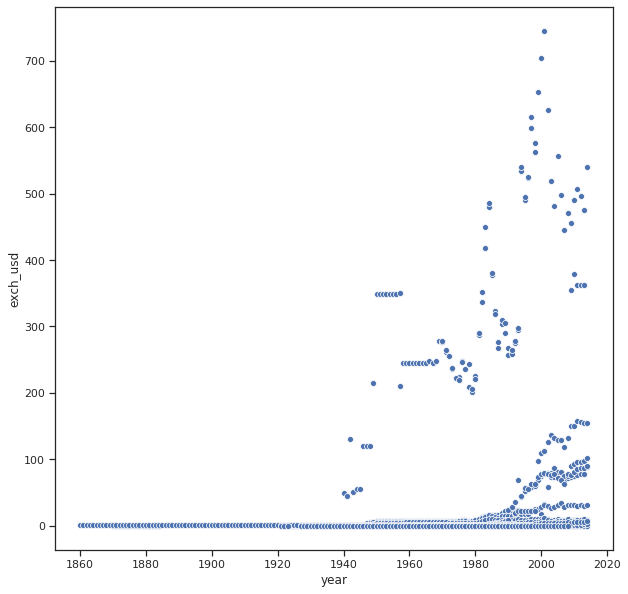

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='year', y='exch_usd', data=data)

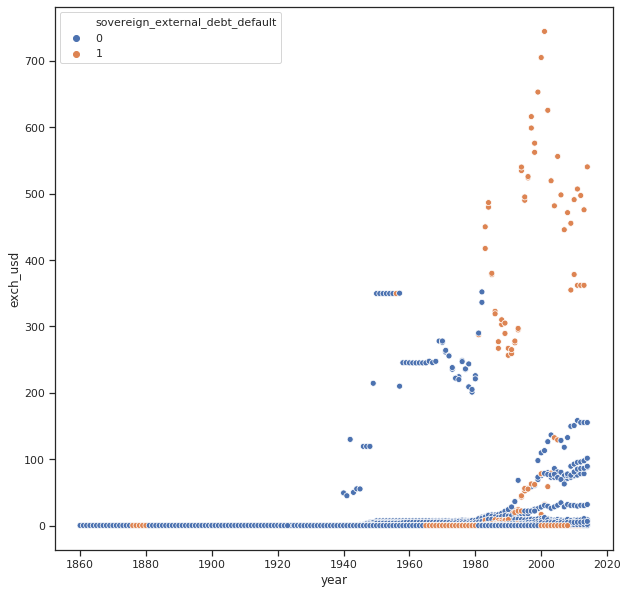

In [45]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='year', y='exch_usd', data=data, hue='sovereign_external_debt_default')

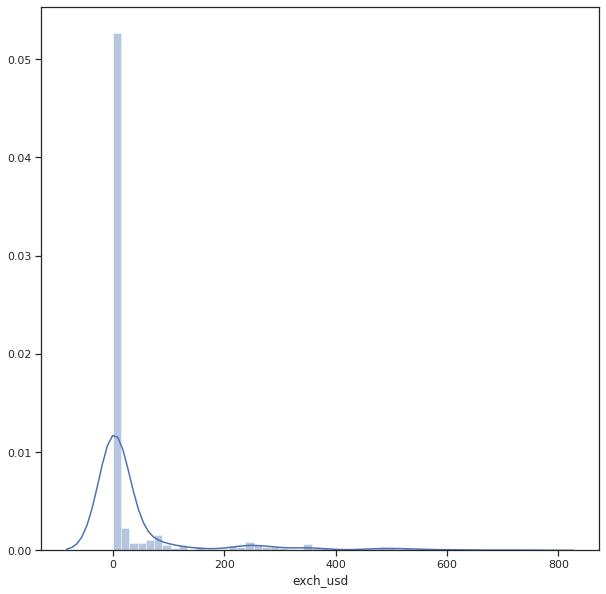

In [38]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['exch_usd'])

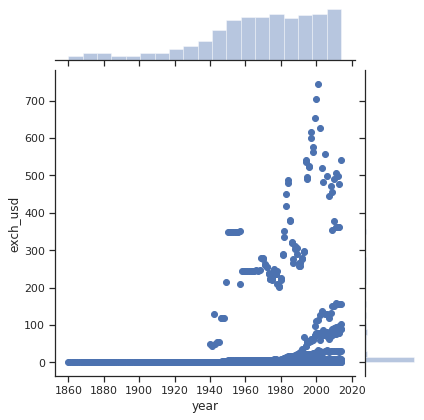

In [49]:
sns.jointplot(x='year', y='exch_usd', data=data)


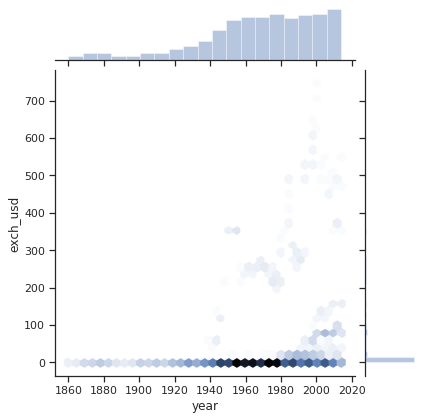

In [51]:
sns.jointplot(x='year', y='exch_usd', data=data, kind="hex")

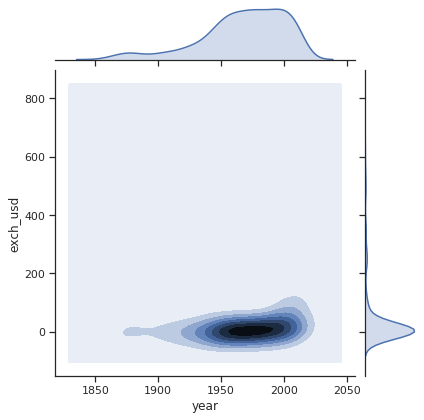

In [52]:
sns.jointplot(x='year', y='exch_usd', data=data, kind="kde")

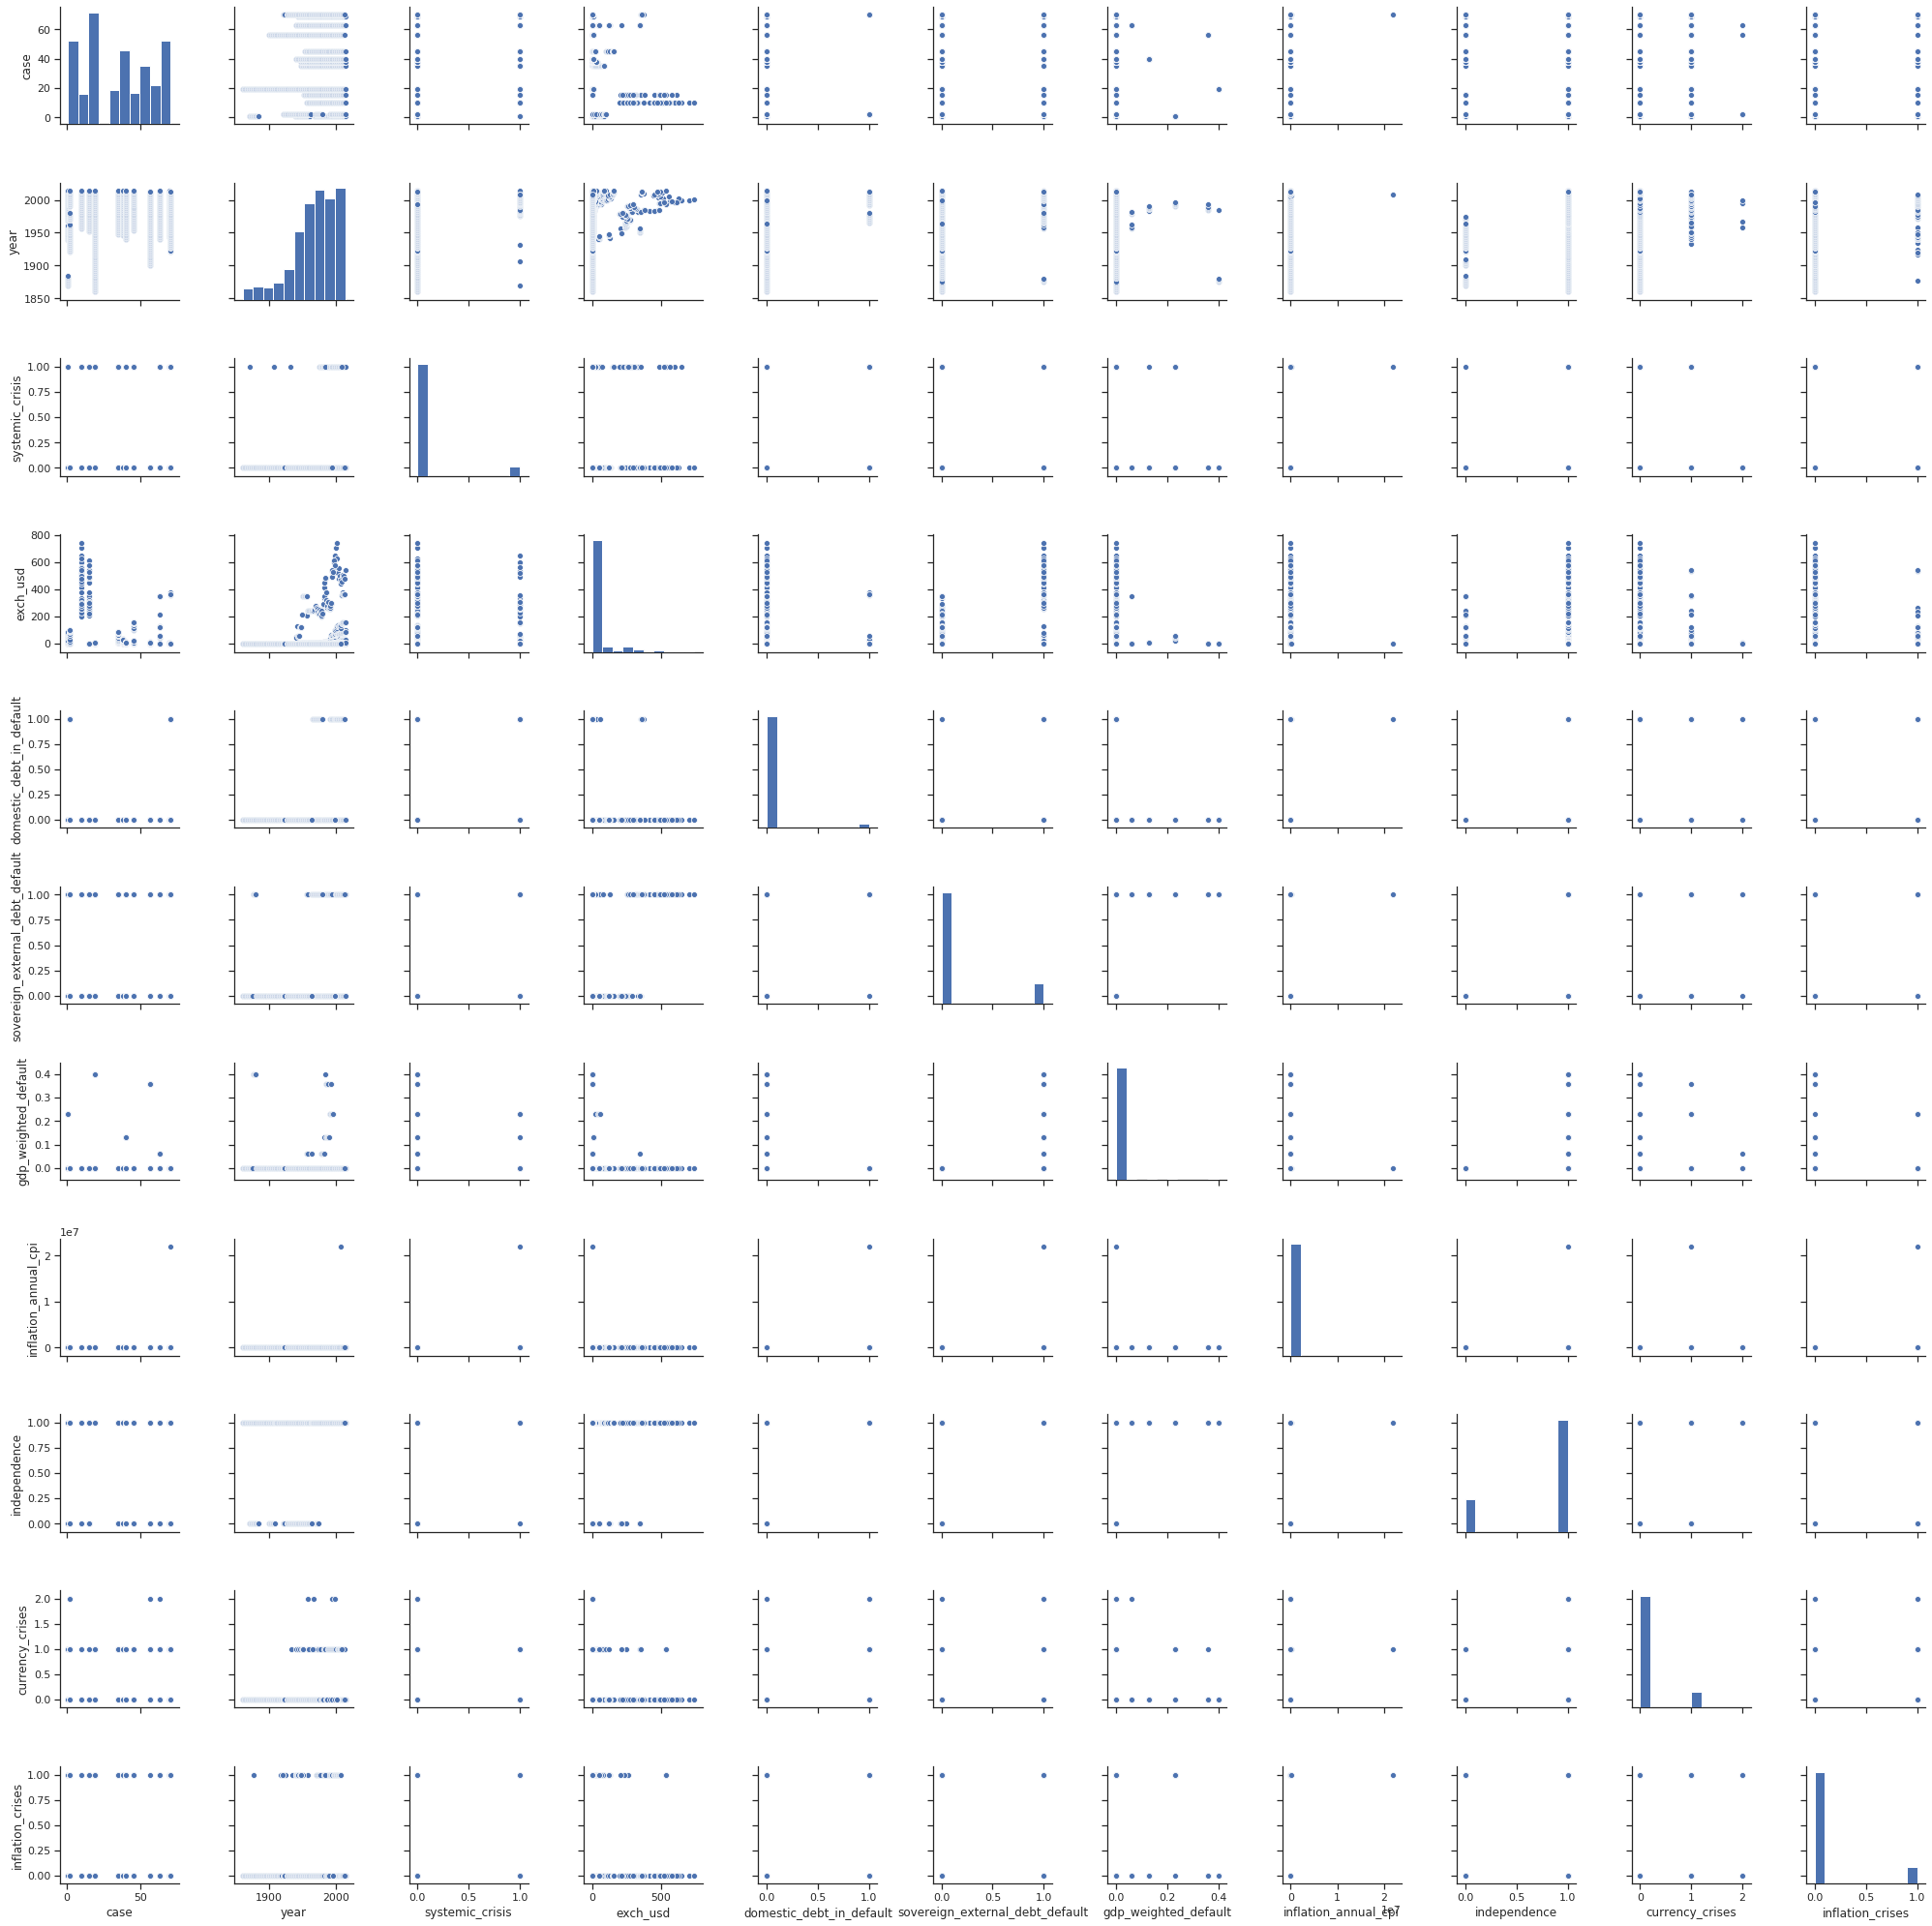

In [54]:
sns.pairplot(data)

/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/lisobol/tensorflow_env/my_tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


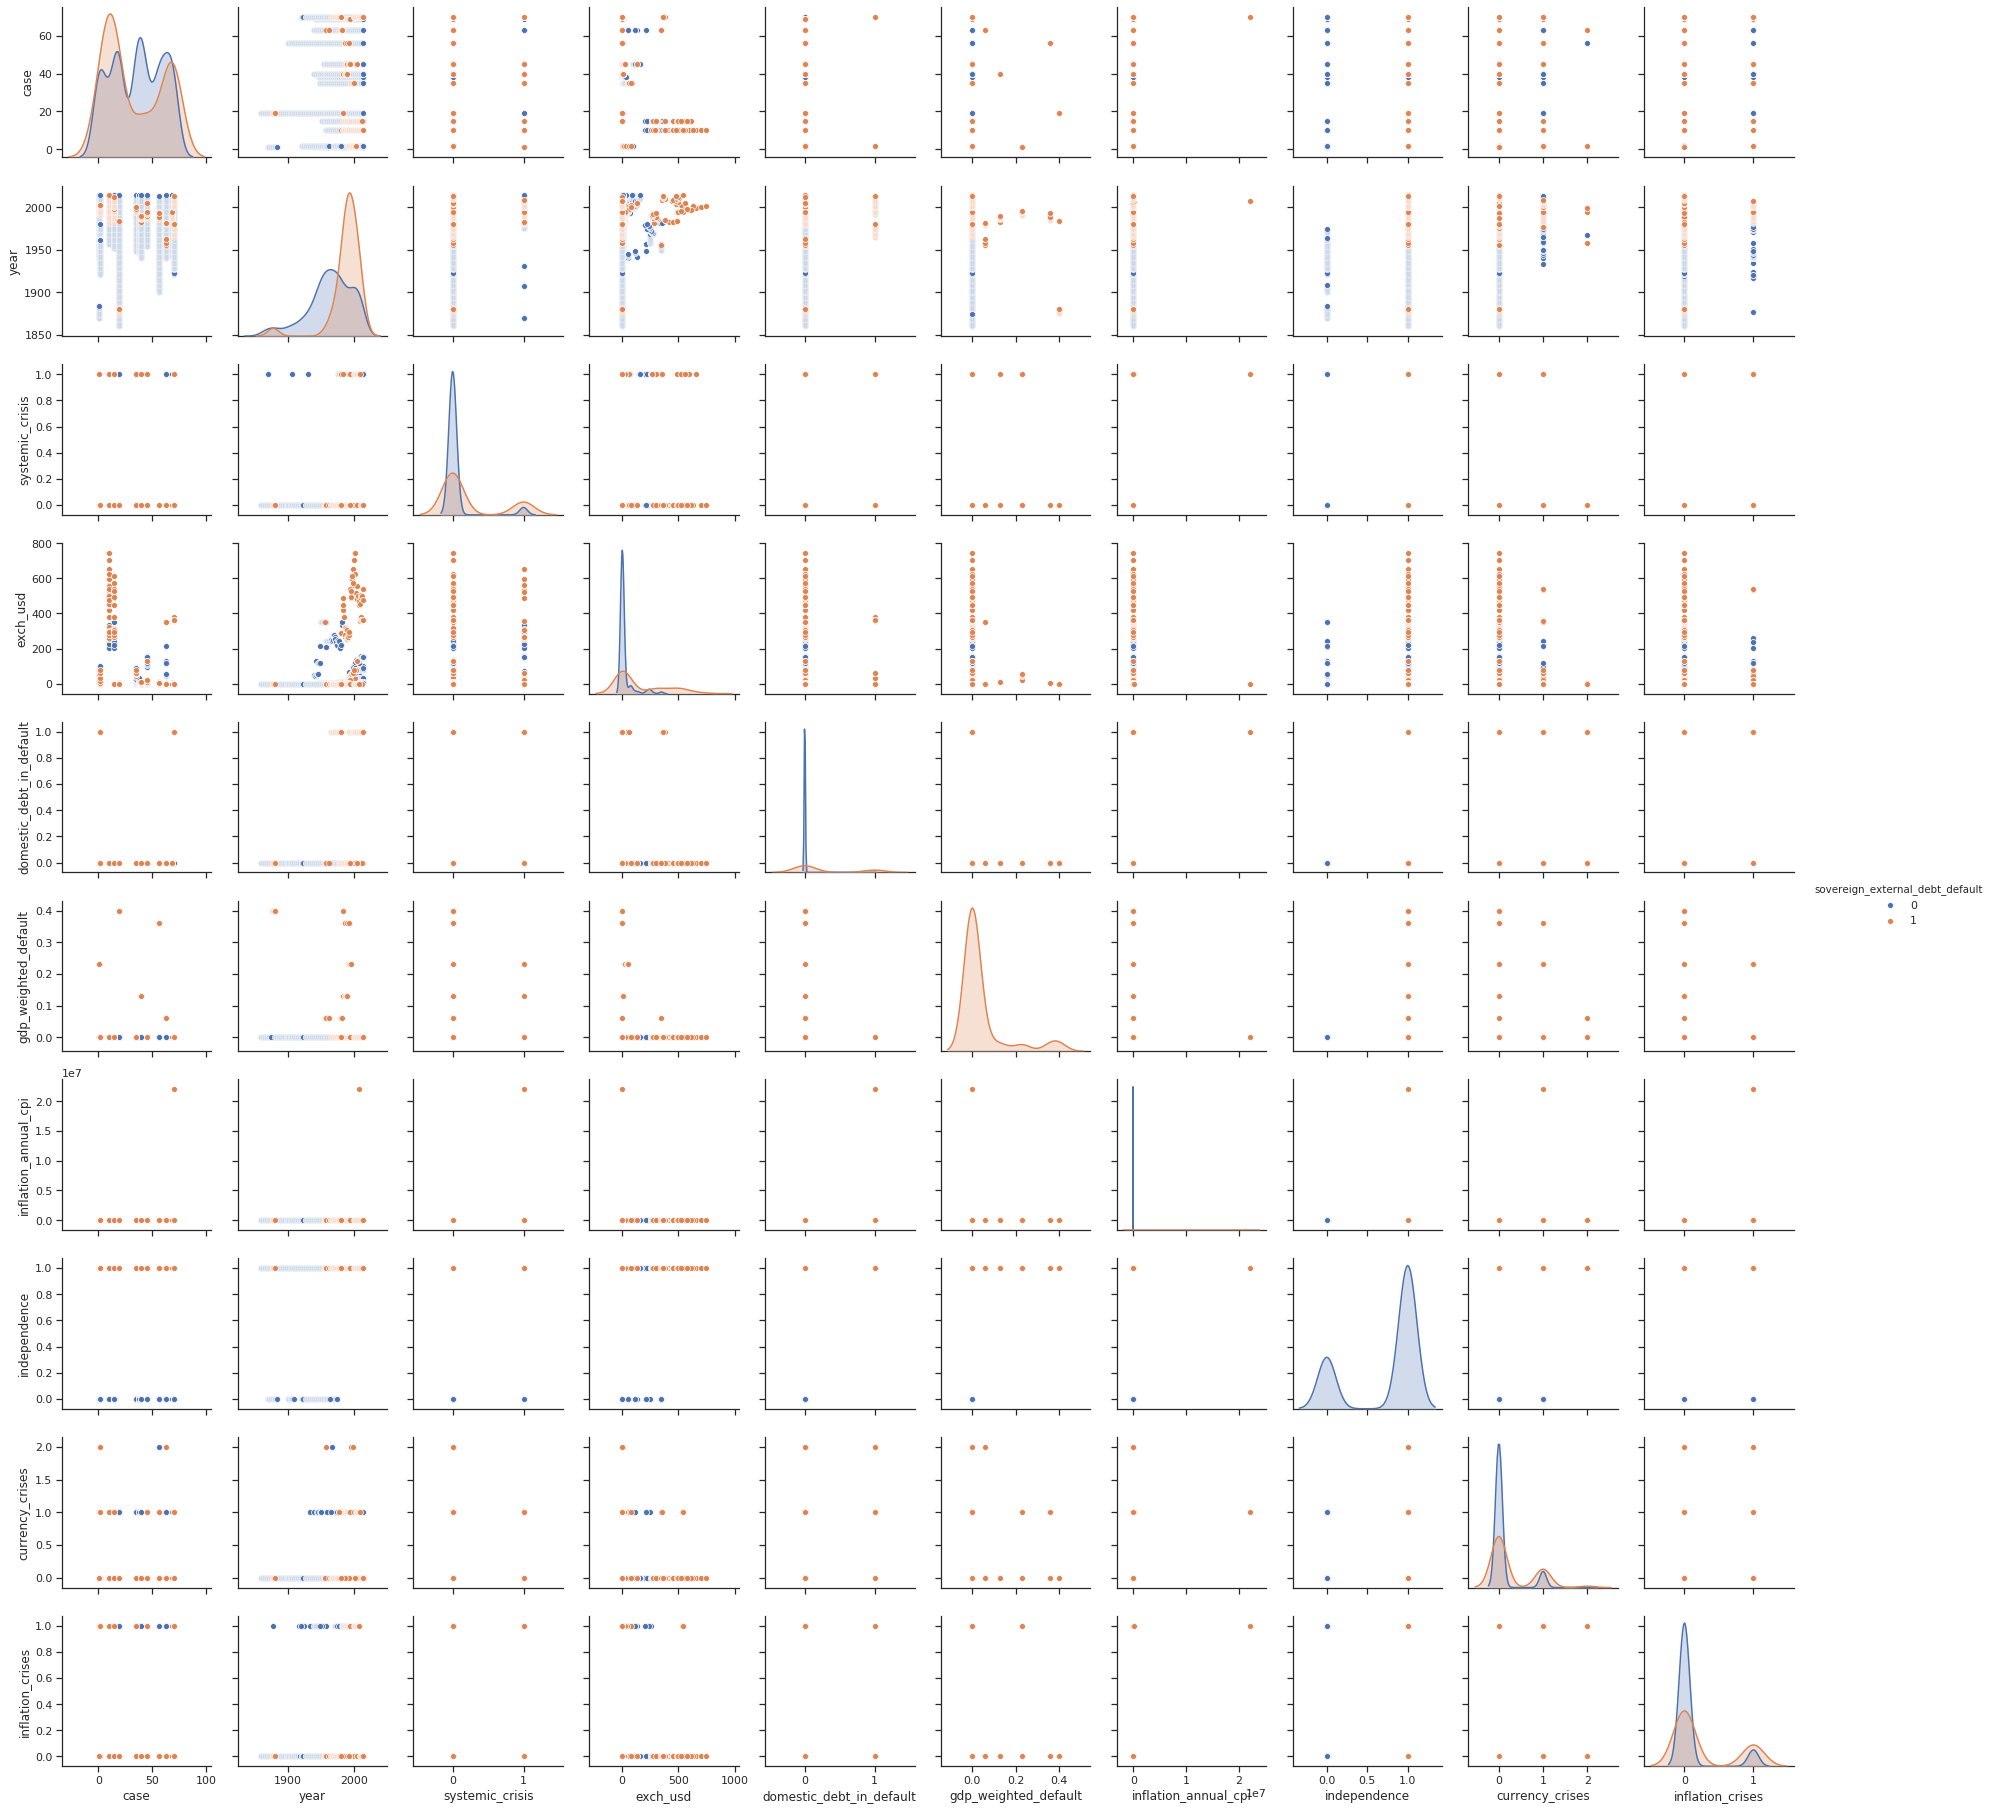

In [55]:
sns.pairplot(data, hue="sovereign_external_debt_default")

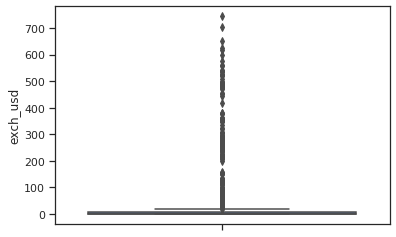

In [57]:
sns.boxplot(y=data['exch_usd'])

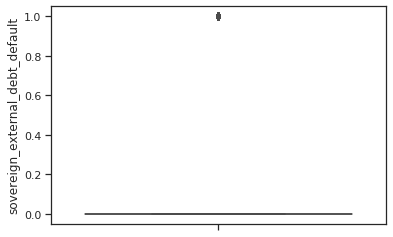

In [58]:
sns.boxplot(y=data['sovereign_external_debt_default'])

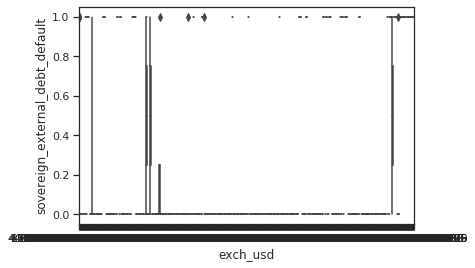

In [59]:
sns.boxplot(x='exch_usd', y='sovereign_external_debt_default', data=data)

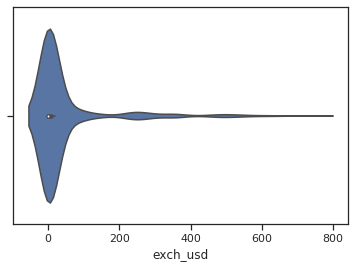

In [60]:

sns.violinplot(x=data['exch_usd'])

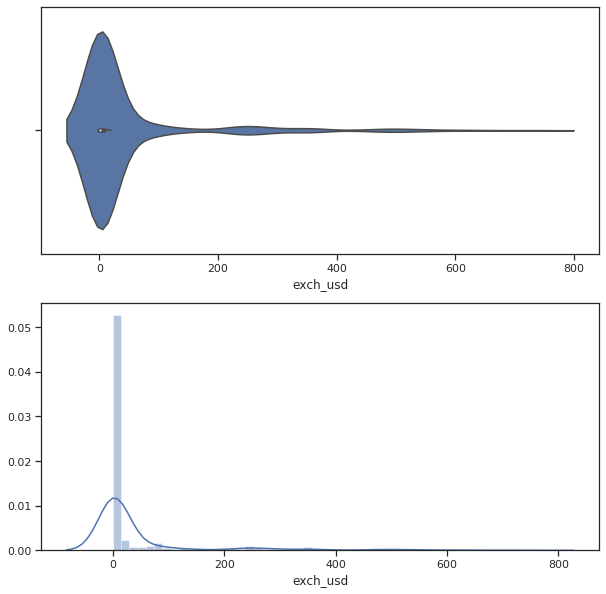

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['exch_usd'])
sns.distplot(data['exch_usd'], ax=ax[1])

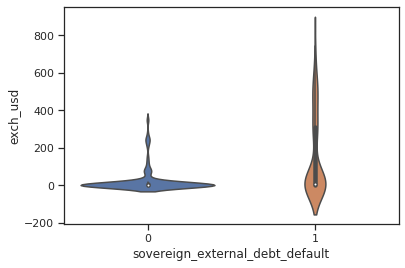

In [62]:

# Распределение параметра exch_usd сгруппированные по sovereign_external_debt_default.
sns.violinplot(x='sovereign_external_debt_default', y='exch_usd', data=data)

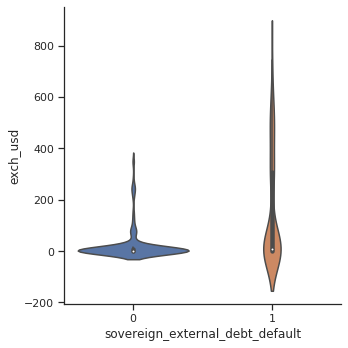

In [63]:

sns.catplot(y='exch_usd', x='sovereign_external_debt_default', data=data, kind="violin", split=True)

In [64]:
data.corr()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


In [65]:
data.corr(method='pearson')

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


In [66]:
data.corr(method='kendall')

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.026923,0.009063,-0.187706,0.130510,-0.030077,-0.000727,0.019151,0.021411,0.087497,0.012142
year,0.026923,1.000000,0.186655,0.368117,0.121203,0.260867,0.017020,0.217394,0.416064,0.158605,0.072022
systemic_crisis,0.009063,0.186655,1.000000,0.142943,0.122158,0.249850,0.014215,0.126022,0.147083,0.119988,0.172562
exch_usd,-0.187706,0.368117,0.142943,1.000000,-0.114600,0.098473,0.038681,0.101890,0.247936,0.013929,-0.023109
domestic_debt_in_default,0.130510,0.121203,0.122158,-0.114600,1.000000,0.464751,-0.034499,0.113715,0.109120,0.213415,0.224429
sovereign_external_debt_default,-0.030077,0.260867,0.249850,0.098473,0.464751,1.000000,0.399467,0.097109,0.228192,0.191004,0.187930
gdp_weighted_default,-0.000727,0.017020,0.014215,0.038681,-0.034499,0.399467,1.000000,0.047894,0.091155,0.021086,0.019027
inflation_annual_cpi,0.019151,0.217394,0.126022,0.101890,0.113715,0.097109,0.047894,1.000000,0.131748,0.267035,0.463341
independence,0.021411,0.416064,0.147083,0.247936,0.109120,0.228192,0.091155,0.131748,1.000000,0.084501,-0.022548
currency_crises,0.087497,0.158605,0.119988,0.013929,0.213415,0.191004,0.021086,0.267035,0.084501,1.000000,0.397948


In [67]:
data.corr(method='spearman')

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.039273,0.010663,-0.250869,0.153555,-0.035389,-0.000585,0.026830,0.025191,0.103034,0.014286
year,0.039273,1.000000,0.227475,0.512162,0.147710,0.317916,0.019954,0.309844,0.507054,0.193589,0.087773
systemic_crisis,0.010663,0.227475,1.000000,0.174649,0.122158,0.249850,0.014295,0.154250,0.147083,0.120208,0.172562
exch_usd,-0.250869,0.512162,0.174649,1.000000,-0.140019,0.120315,0.047506,0.154363,0.302930,0.017115,-0.028235
domestic_debt_in_default,0.153555,0.147710,0.122158,-0.140019,1.000000,0.464751,-0.034694,0.139187,0.109120,0.213806,0.224429
sovereign_external_debt_default,-0.035389,0.317916,0.249850,0.120315,0.464751,1.000000,0.401730,0.118861,0.228192,0.191353,0.187930
gdp_weighted_default,-0.000585,0.019954,0.014295,0.047506,-0.034694,0.401730,1.000000,0.058778,0.091671,0.021262,0.019134
inflation_annual_cpi,0.026830,0.309844,0.154250,0.154363,0.139187,0.118861,0.058778,1.000000,0.161259,0.326982,0.567128
independence,0.025191,0.507054,0.147083,0.302930,0.109120,0.228192,0.091671,0.161259,1.000000,0.084656,-0.022548
currency_crises,0.103034,0.193589,0.120208,0.017115,0.213806,0.191353,0.021262,0.326982,0.084656,1.000000,0.398676


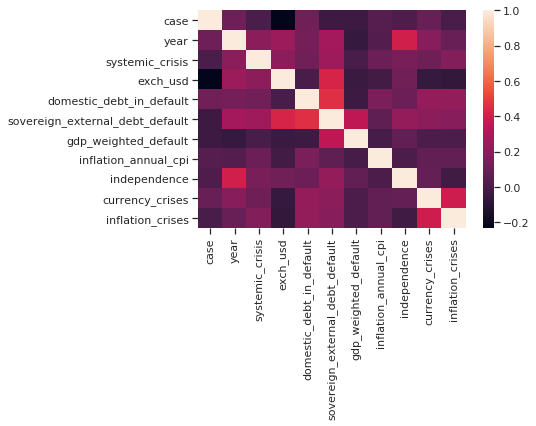

In [68]:
sns.heatmap(data.corr())

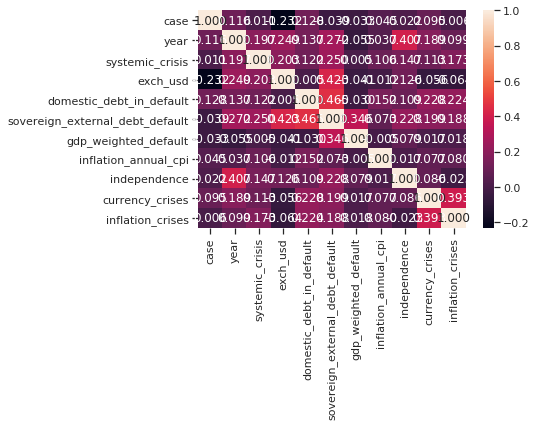

In [69]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

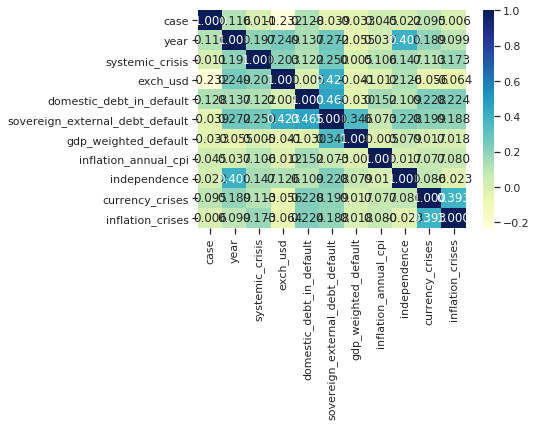

In [70]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

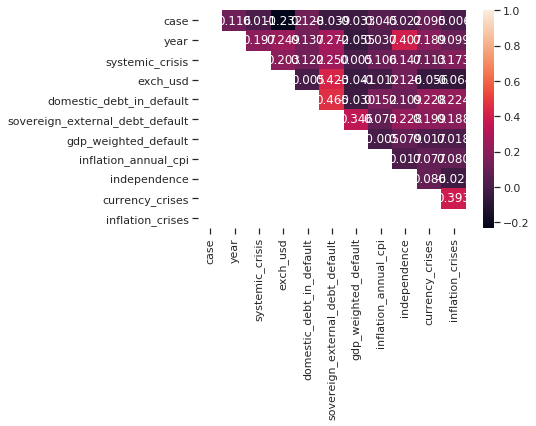

In [73]:

# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

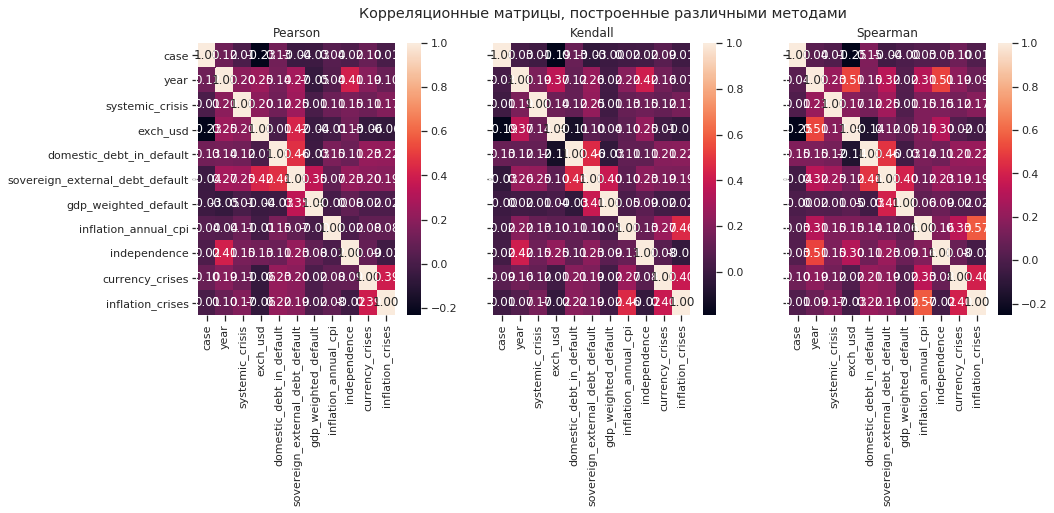

In [74]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')